# Just some notes on PCA in Python

**Guillermo Moncecchi**

This notebook contains just some code notes on Principal Component Analysis, based on a very simple example.  If you want the original, much better explanation, refer to [this](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html) page from Sebastian Raschka.

import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
numpy.set_printoptions(suppress=True,precision=3)
from matplotlib.patches import FancyArrowPatch

Let us define a very simple dataset, with 6 people, identified by their heigth, weigth, and the length of their middle finger (?). Each column is an instance, with 3 attributes. 

In [80]:
X_men=np.array([[1.97,110,5],[1.80,70,4.8],[1.70,90,4.9]]).transpose()
X_women=np.array([[1.65,52,4.7],[1.75,60,4.8],[1.67,58,4.6]]).transpose()

X = np.hstack((X_men,X_women))
print (X)

[[   1.97    1.8     1.7     1.65    1.75    1.67]
 [ 110.     70.     90.     52.     60.     58.  ]
 [   5.      4.8     4.9     4.7     4.8     4.6 ]]


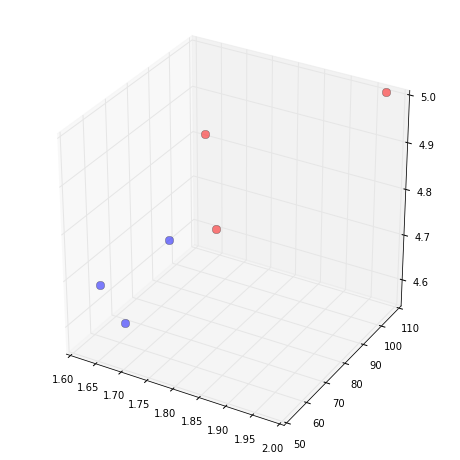

In [81]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(X_men[0,:], X_men[1,:], X_men[2,:], 'o', markersize=8, color='red', alpha=0.5, label='class1')
ax.plot(X_women[0,:], X_women[1,:], X_women[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')



plt.show()


Calculate mean, standard deviation and variance for every attribute, using the axis property of each of the methods

In [93]:
#print (np.average(X,axis=1))
#print (np.std(X,axis=1,ddof=1))
#print (np.var(X,axis=1,ddof=1))

mean=np.mean(X,axis=1)
std=np.std(X,axis=1)
var=np.var(X,axis=1)

print ("Means:",mean)
print ("Standard deviations:",std)
print ("Variances:",var)



#mean_x = np.mean(X[0,:])
#mean_y = np.mean(X[1,:])
#mean_z = np.mean(X[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

Means: [  1.757  73.333   4.8  ]
Standard deviations: [  0.108  20.418   0.129]
Variances: [   0.012  416.889    0.017]


Now, obtain the covariance matrix for our sample

In [94]:
cvm=np.cov(X)
print (cvm)

[[   0.014    2.085    0.013]
 [   2.085  500.267    2.84 ]
 [   0.013    2.84     0.02 ]]


Calculate eigenvalues and eigenvectors from the covariance matrix. Since it is symmetric, we know they are real numbers

In [82]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cvm)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Eigenvector:')
    print(eigvec_cov)


Eigenvalue 1 from covariance matrix: 500.29148213264557
Eigenvector:
[[ 0.004]
 [ 1.   ]
 [ 0.006]]
Eigenvalue 2 from covariance matrix: 0.005885653498275098
Eigenvector:
[[ 0.866]
 [-0.006]
 [ 0.501]]
Eigenvalue 3 from covariance matrix: 0.0032055471897821765
Eigenvector:
[[-0.501]
 [-0.003]
 [ 0.866]]


Verify that the eigenvalue equation holds:

In [83]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(cvm.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)



In [84]:
#  Sort eigenvectors given their eigenvalue

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i)
    #    print(i[0])



(500.29148213264557, array([ 0.004,  1.   ,  0.006]))
(0.0058856534982750976, array([ 0.866, -0.006,  0.501]))
(0.0032055471897821765, array([-0.501, -0.003,  0.866]))


In [85]:
# Just to principal components
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)



Matrix W:
 [[ 0.004  0.866]
 [ 1.    -0.006]
 [ 0.006  0.501]]


Transform instances to the new subspace...

In [97]:
# Transform instance to the new subspace

transformed = np.dot(X.T,matrix_w).transpose()
print (transformed)

[[ 110.034   70.033   90.033   52.032   60.033   58.032]
 [   3.499    3.51     3.344    3.446    3.531    3.374]]


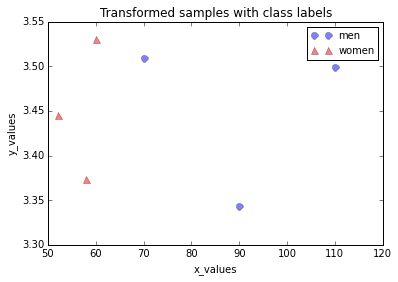

In [98]:
plt.plot(transformed[0,0:3], transformed[1,0:3], 'o', markersize=7, color='blue', alpha=0.5, label='men')
plt.plot(transformed[0,3:6], transformed[1,3:6], '^', markersize=7, color='red', alpha=0.5, label='women')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()



In [88]:
# Just one dimension seems enough!
matrix_w2 = np.hstack((eig_pairs[0][1].reshape(3,1),))
print('Matrix W:\n', matrix_w2)



Matrix W:
 [[ 0.004]
 [ 1.   ]
 [ 0.006]]


In [99]:
transformed2 = np.dot(X.T,matrix_w2).transpose()
print (transformed2)

[[ 110.034   70.033   90.033   52.032   60.033   58.032]]


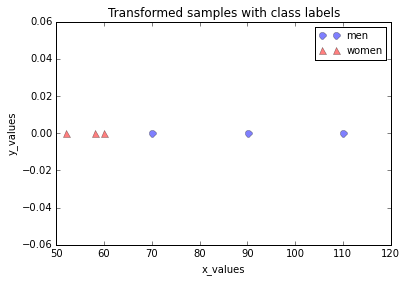

In [100]:
plt.plot(transformed2[0,0:3],[0,0,0], 'o', markersize=7, color='blue', alpha=0.5, label='men')
plt.plot(transformed2[0,3:6],[0,0,0], '^', markersize=7, color='red', alpha=0.5, label='women')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()